In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Folds5x2_pp.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
df.rename(columns={'AT': 'Average Temperature', 'V': 'Exhaust Vacuum','AP': 'Ambient Pressure',
                   'RH': 'Relative Humidity ','PE': 'Net Hourly Electrical Energy Output'}, inplace=True)
df.head()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
X = df.drop("Net Hourly Electrical Energy Output", axis=1).values
y = df["Net Hourly Electrical Energy Output"].values

In [ ]:
X

array([[   8.34,   40.77, 1010.84,   90.01],
       [  23.64,   58.49, 1011.4 ,   74.2 ],
       [  29.74,   56.9 , 1007.15,   41.91],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [ ]:
y

array([480.48, 445.75, 438.76, ..., 465.96, 450.93, 451.67])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=6, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=6, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1))

In [ ]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 205195.7500 - val_loss: 202287.1250
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 193006.4688 - val_loss: 178267.2656
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 152768.4062 - val_loss: 123728.2188
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 92408.0469 - val_loss: 64738.6641
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 45660.9688 - val_loss: 32297.5625
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 25547.7832 - val_loss: 20745.1543
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 18188.4473 - val_loss: 15849.8027
Epoch 8/100
240/240 [==============================] - 1s 3ms/step - loss: 14290.4941 - val_loss: 12520.9014
Epoch 9/100
240/240 [==============================] - 1s 3ms/step - loss: 11122.1172 - val_loss: 9540.9473
Epoch 10/100
2

In [ ]:
pd.DataFrame(ann.history.history)

,loss,val_loss
0,205195.750000,202287.125000
1,193006.468750,178267.265625
2,152768.406250,123728.218750
3,92408.046875,64738.664062
4,45660.968750,32297.562500
...,...,...
63,21.589903,19.634108
64,21.541481,19.952002
65,21.708099,19.687109
66,21.427887,20.100420


In [ ]:
import matplotlib.pyplot as plt

<Axes: >

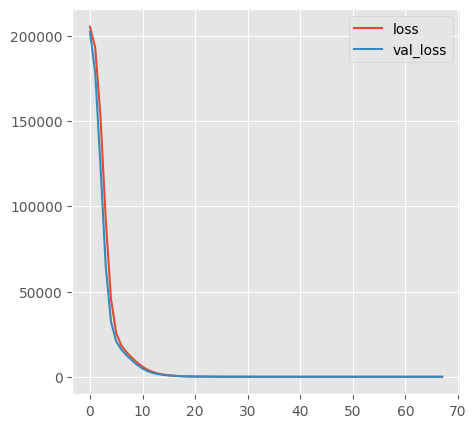

In [ ]:
plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(5,5))

In [ ]:
ann.evaluate(X_train,y_train)

240/240 [==============================] - 1s 2ms/step - loss: 21.4880


21.488039016723633

In [ ]:
ann.evaluate(X_test,y_test)

60/60 [==============================] - 0s 2ms/step - loss: 20.0508


20.050838470458984